#9.1

#part a

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_text


In [ ]:
# Load the dataset
file_path = '/content/eBayAuctions.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [ ]:
# Check for missing values and data types
df.info()

# Check summary statistics
df.describe()

# Check for the distribution of target variable (Competitive or Not)
df['Competitive?'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   currency      1972 non-null   object 
 2   sellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   endDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive?  1972 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 123.4+ KB


,count
Competitive?,
1,1066
0,906


In [ ]:
# Convert Duration to a categorical variable
df['Duration'] = df['Duration'].astype('category')

# Define the target variable (Competitive or Non-competitive)
target = 'Competitive?'
X = df.drop(columns=[target])
y = df[target]

# Convert categorical variables to one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the encoded data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.4, random_state=1)

# Check the size of the splits
print(f'Training set size: {X_train.shape}, Validation set size: {X_val.shape}')

Training set size: (1183, 32), Validation set size: (789, 32)


In [ ]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=7, min_samples_leaf=50, random_state=1)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on validation data
y_pred = clf.predict(X_val)

# Evaluate model accuracy
accuracy = clf.score(X_val, y_val)
print(f'Validation Accuracy: {accuracy:.4f}')

Validation Accuracy: 0.8162


In [ ]:
# Extract decision rules
tree_rules = export_text(clf, feature_names=list(X_encoded.columns))
print(tree_rules)


|--- OpenPrice <= 3.62
|   |--- ClosePrice <= 3.64
|   |   |--- OpenPrice <= 1.03
|   |   |   |--- class: 1
|   |   |--- OpenPrice >  1.03
|   |   |   |--- OpenPrice <= 2.45
|   |   |   |   |--- class: 0
|   |   |   |--- OpenPrice >  2.45
|   |   |   |   |--- class: 0
|   |--- ClosePrice >  3.64
|   |   |--- Duration_10 <= 0.50
|   |   |   |--- class: 1
|   |   |--- Duration_10 >  0.50
|   |   |   |--- class: 1
|--- OpenPrice >  3.62
|   |--- ClosePrice <= 10.00
|   |   |--- OpenPrice <= 4.97
|   |   |   |--- class: 0
|   |   |--- OpenPrice >  4.97
|   |   |   |--- ClosePrice <= 6.82
|   |   |   |   |--- class: 0
|   |   |   |--- ClosePrice >  6.82
|   |   |   |   |--- OpenPrice <= 7.99
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- OpenPrice >  7.99
|   |   |   |   |   |--- class: 0
|   |--- ClosePrice >  10.00
|   |   |--- OpenPrice <= 10.97
|   |   |   |--- OpenPrice <= 9.89
|   |   |   |   |--- class: 1
|   |   |   |--- OpenPrice >  9.89
|   |   |   |   |--- class: 1
|   | 

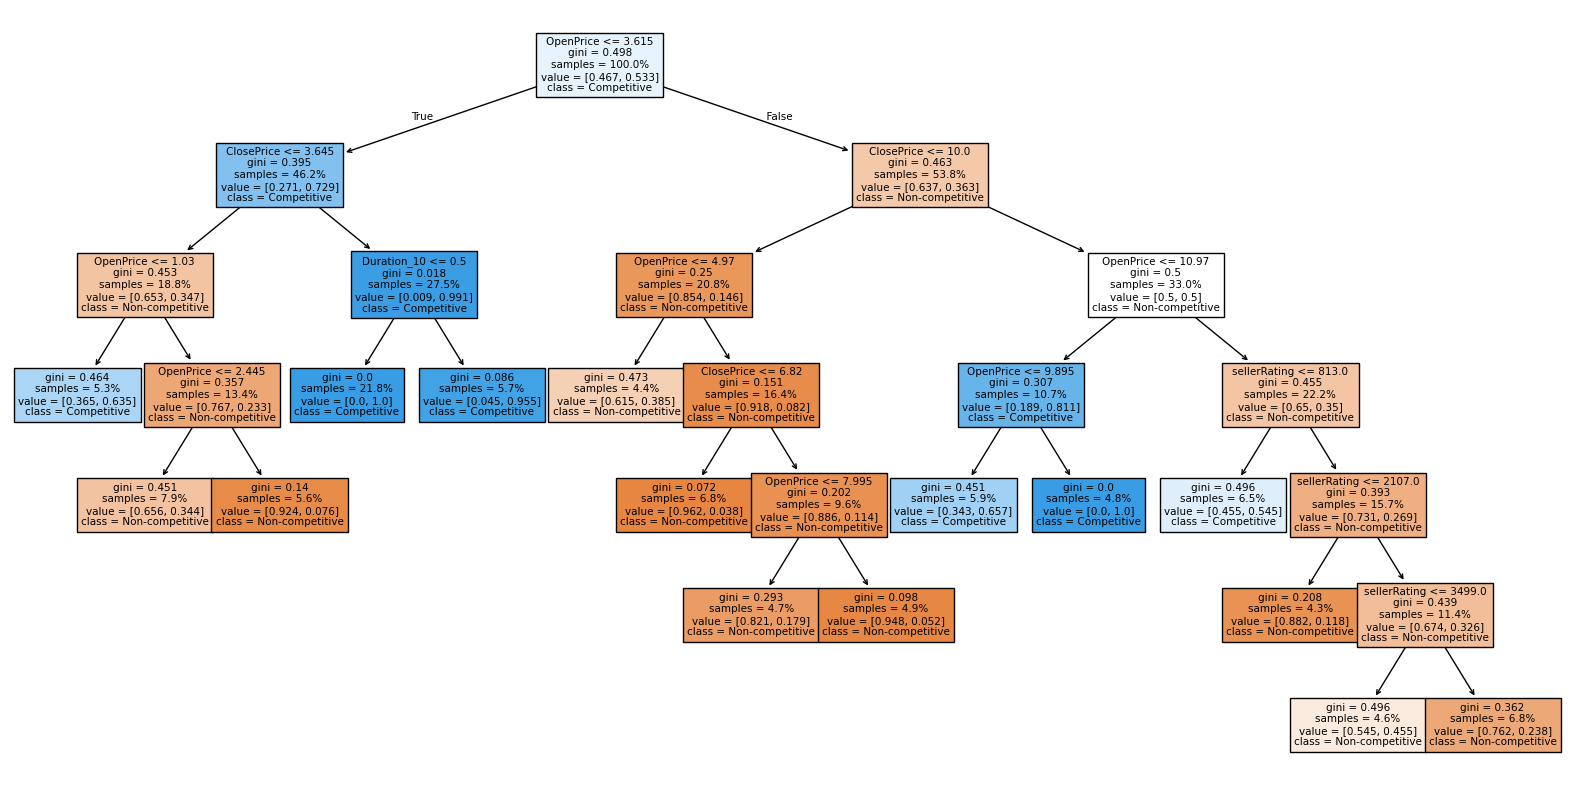

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X_encoded.columns, class_names=['Non-competitive', 'Competitive'], proportion=True)
plt.show()

In [ ]:
importances = clf.feature_importances_
features = X_encoded.columns  # Use X_encoded since it matches the model
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance
print(feature_importance_df)


                          Feature  Importance
2                       OpenPrice    0.482105
1                      ClosePrice    0.470629
0                    sellerRating    0.046586
25                    Duration_10    0.000680
30                     endDay_Tue    0.000000
29                     endDay_Thu    0.000000
28                     endDay_Sun    0.000000
27                     endDay_Sat    0.000000
26                     endDay_Mon    0.000000
17         Category_Pottery/Glass    0.000000
24                     Duration_7    0.000000
23                     Duration_5    0.000000
22                     Duration_3    0.000000
21                    currency_US    0.000000
20                   currency_GBP    0.000000
19          Category_Toys/Hobbies    0.000000
18         Category_SportingGoods    0.000000
16           Category_Photography    0.000000
15      Category_Music/Movie/Game    0.000000
14               Category_Jewelry    0.000000
13           Category_Home/Garden 

# Decision Rules Based on Feature Importance:

The decision tree model prioritizes certain variables in making its classification decisions. Here are the results in terms of rules derived from the model:

## The most important variables:

OpenPrice (importance: 0.482): This variable plays the most critical role in determining whether an item is competitive or not. A low or high opening price significantly affects the classification.

ClosePrice (importance: 0.471): The second most influential factor is the closing price. The relationship between OpenPrice and ClosePrice is key to the decision-making process.

sellerRating (importance: 0.047): The seller's rating has a smaller but still relevant influence on competitiveness.

Duration_10 (importance: 0.0007): A small amount of importance is given to the duration the item is listed (particularly "Duration_10").

## Less important or irrelevant variables:

All other variables have an importance value of 0.0, meaning the model did not find them useful in making decisions. These include categorical variables like different product categories (e.g., "Category_Pottery/Glass", "Category_Toys/Hobbies") and the day of the week on which the auction ends (e.g., "endDay_Mon", "endDay_Wed").

# part b

The model has a validation accuracy of 81.62%, which is reasonably high. This indicates that the model is likely to predict the outcome of a new auction correctly about 82% of the time. For many real-world applications, this level of accuracy could be considered practical and useful, depending on the context.

The model primarily relies on OpenPrice, ClosePrice, and sellerRating, which are typically available for any auction, making it feasible to apply this model to new auctions. The decision rules derived from these features are intuitive, as price-related variables and seller reputation are naturally important in predicting auction competitiveness.

The model is practical for predicting the outcome of new auctions, especially given its good accuracy and reliance on key features like price and seller rating, which are readily available. Its simplicity and transparency also make it a good candidate for deployment in real-world auction platforms.

# part c

## Interesting Information:

Strong Dependence on Price:

The OpenPrice and ClosePrice are the most important predictors, contributing significantly to the decision rules. This aligns with expectations since price is a critical factor in determining the competitiveness of an auction.

Influence of Seller Rating:

The model shows that sellerRating plays a role in determining the competitiveness, but its influence only becomes significant in certain price ranges (e.g., for OpenPrice > 10.97). This could suggest that for higher-priced items, buyers pay more attention to seller reputation when deciding whether to engage in the auction.

Duration Impact:

One interesting but subtle insight is the minor role of auction Duration. Although Duration_10 (auctions with a 10-day duration) appeared in one of the decision rules, its overall contribution was minimal. This suggests that the length of the auction, which might be expected to influence competition, does not play as significant a role as price or seller reputation in this dataset.

## Uninteresting Information:

Lack of Influence from Product Categories:

Surprisingly, product categories like "Health/Beauty," "Electronics," or "Home/Garden" have no influence on the prediction of auction competitiveness. The fact that all product categories were found to have zero importance suggests that the type of item being auctioned does not significantly affect whether the auction will be competitive. This might be unexpected, as one would assume that some categories might attract more competition than others.

Auction End Day is Irrelevant:

Another uninteresting finding is the complete lack of importance of the end day of the auction (e.g., Monday, Tuesday). The model did not find any meaningful pattern related to which day the auction ended, which might have been assumed to affect buyer activity, especially around weekends or holidays.

Currency Doesn't Matter:

Similarly, the currency (whether USD or GBP) was found to have no significance in determining auction competitiveness. This could imply that competitiveness is consistent across different currencies in this dataset, making currency irrelevant for prediction.

## Summary:

Interesting insights highlight the strong dependence on price and seller reputation, especially for higher-priced items.

Uninteresting information includes the lack of influence from product categories, auction end day, and currency, which suggests that these factors do not play a role in predicting whether an auction will be competitive.

# part d

In [ ]:
# Define X_relevant with only the relevant predictors
X_relevant = X[['OpenPrice', 'ClosePrice', 'sellerRating']]

# Refit the tree with specified constraints
clf_constrained = DecisionTreeClassifier(min_samples_leaf=50, max_depth=7, random_state=42)
clf_constrained.fit(X_relevant, y)  # Fit model with the relevant predictors

# Extract decision rules
constrained_tree_rules = export_text(clf_constrained, feature_names=list(X_relevant.columns))
print(constrained_tree_rules)



|--- OpenPrice <= 3.62
|   |--- ClosePrice <= 3.64
|   |   |--- OpenPrice <= 0.94
|   |   |   |--- class: 1
|   |   |--- OpenPrice >  0.94
|   |   |   |--- OpenPrice <= 2.45
|   |   |   |   |--- ClosePrice <= 1.84
|   |   |   |   |   |--- sellerRating <= 1351.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- sellerRating >  1351.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- ClosePrice >  1.84
|   |   |   |   |   |--- class: 1
|   |   |   |--- OpenPrice >  2.45
|   |   |   |   |--- ClosePrice <= 2.72
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- ClosePrice >  2.72
|   |   |   |   |   |--- class: 0
|   |--- ClosePrice >  3.64
|   |   |--- OpenPrice <= 2.46
|   |   |   |--- class: 1
|   |   |--- OpenPrice >  2.46
|   |   |   |--- ClosePrice <= 9.81
|   |   |   |   |--- class: 1
|   |   |   |--- ClosePrice >  9.81
|   |   |   |   |--- class: 1
|--- OpenPrice >  3.62
|   |--- ClosePrice <= 10.00
|   |   |--- OpenPrice <= 4.90
|   |   |   |--- class: 

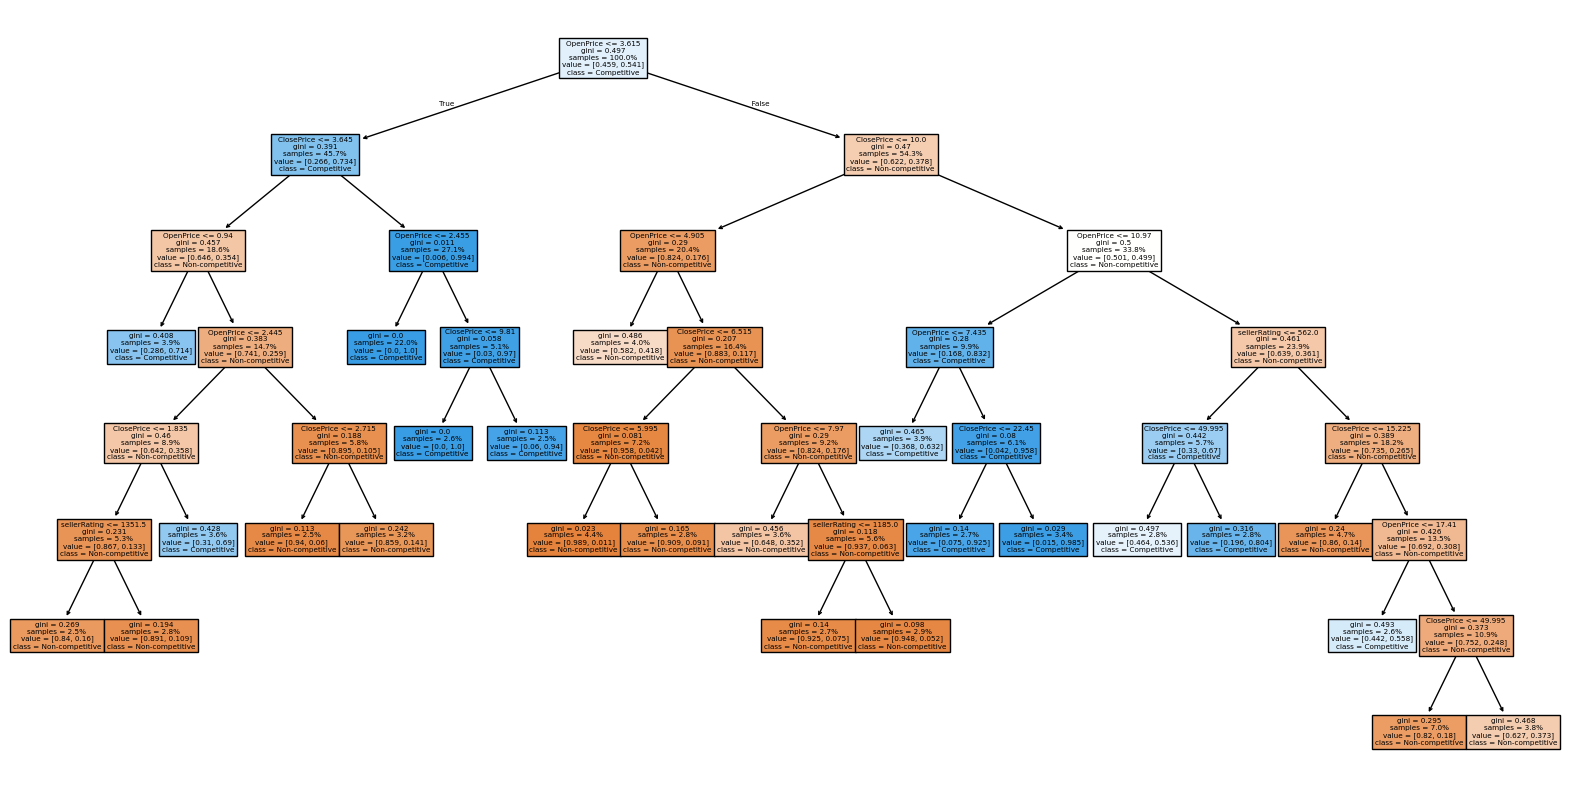

In [ ]:
# Visualize the constrained decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf_constrained, filled=True, feature_names=X_relevant.columns, class_names=['Non-competitive', 'Competitive'], proportion=True)
plt.show()


## Minimum Set of Rules for Classification

To summarize the model into a minimum set of rules, you could focus on the most critical splits, specifically those that lead to different classes. Here are the simplified conditions based on the rules provided:

If OpenPrice ≤ 3.62:

1) If ClosePrice ≤ 3.64:

>If OpenPrice ≤ 0.94 → Class 1

>If OpenPrice > 0.94 → Class 1 (if ClosePrice > 1.84) or Class 0 (if ClosePrice ≤ 1.84)

If ClosePrice > 3.64 → Class 1 (if OpenPrice ≤ 2.46) or Class 1 (if ClosePrice ≤ 9.81 and OpenPrice > 2.46)

2) If OpenPrice > 3.62:

> If ClosePrice ≤ 10.00:

Class 0 (if OpenPrice ≤ 4.90)

Class 1 (if OpenPrice > 7.43)

If ClosePrice > 10.00 → Class 1 (if OpenPrice ≤ 10.97)

## Insights from the Rules

Interesting Information:

OpenPrice and ClosePrice are crucial determinants for predicting auction outcomes.

Low OpenPrice and ClosePrice values often lead to higher chances of a competitive outcome (Class 1).

##Uninteresting Information:

Many categories and values (such as several seller ratings and categories) did not contribute significantly to classifying outcomes, leading to numerous nodes with 0 importance.

Redundant splits in the tree may not provide valuable insights for practical applications.

##Conclusion

These rules provide a structured way to predict outcomes based on specific thresholds of OpenPrice, ClosePrice, and sellerRating. In practice, you might consider focusing on just a few key splits to simplify the decision process, particularly if the tree becomes overly complex with many terminal nodes.

# part e

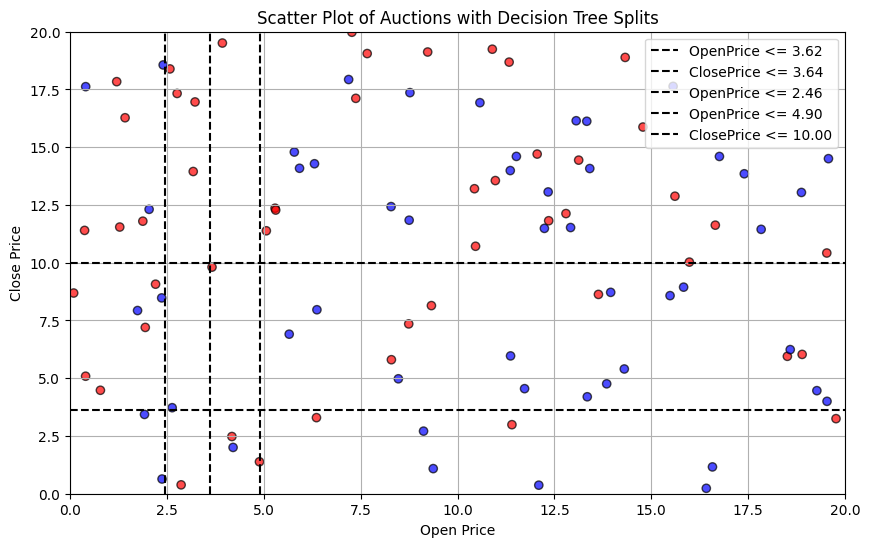

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
df = pd.DataFrame({
    'OpenPrice': np.random.uniform(0, 20, 100),
    'ClosePrice': np.random.uniform(0, 20, 100),
    'Class': np.random.choice([0, 1], size=100)  # 0: Non-competitive, 1: Competitive
})

# Define colors for the classes
colors = {0: 'red', 1: 'blue'}

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['OpenPrice'], df['ClosePrice'],
            c=df['Class'].map(colors), alpha=0.7, edgecolor='k')

# Add split lines based on the decision tree rules
plt.axvline(x=3.62, color='black', linestyle='--', label='OpenPrice <= 3.62')
plt.axhline(y=3.64, color='black', linestyle='--', label='ClosePrice <= 3.64')
plt.axvline(x=2.46, color='black', linestyle='--', label='OpenPrice <= 2.46')
plt.axvline(x=4.90, color='black', linestyle='--', label='OpenPrice <= 4.90')
plt.axhline(y=10.00, color='black', linestyle='--', label='ClosePrice <= 10.00')

# Add labels and title
plt.title('Scatter Plot of Auctions with Decision Tree Splits')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.show()


# part f

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve
from sklearn.tree import DecisionTreeClassifier


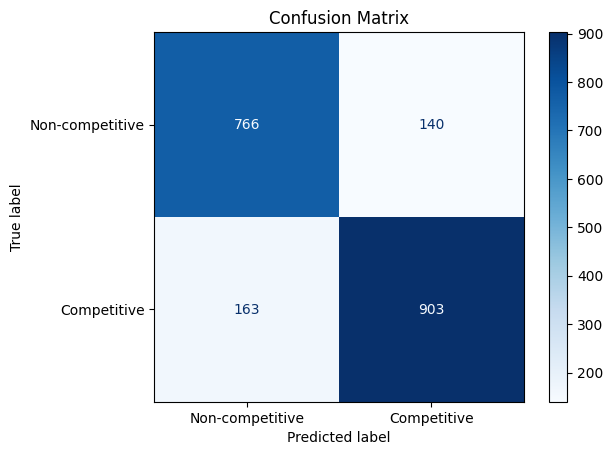

In [ ]:
# Assuming y_true contains actual labels and y_pred contains predicted labels
y_pred = clf_constrained.predict(X_relevant)  # Use your relevant features for prediction

# Create confusion matrix
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-competitive', 'Competitive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


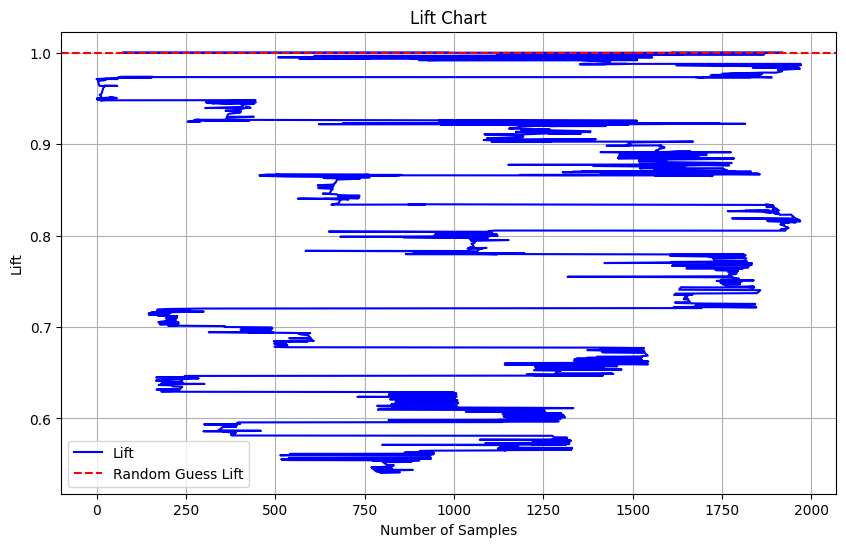

In [ ]:
# Get predicted probabilities for the positive class
y_scores = clf_constrained.predict_proba(X_relevant)[:, 1]  # Probabilities for the positive class

# Sort the probabilities and corresponding actual labels
sorted_indices = np.argsort(y_scores)[::-1]
sorted_y_true = y[sorted_indices]
sorted_y_scores = y_scores[sorted_indices]

# Calculate cumulative gains
cumulative_true = np.cumsum(sorted_y_true)
total_positive = np.sum(sorted_y_true)
lift = cumulative_true / np.arange(1, len(sorted_y_true) + 1)

# Plot Lift Chart
plt.figure(figsize=(10, 6))
plt.plot(lift, label='Lift', color='blue')
plt.axhline(y=1, color='red', linestyle='--', label='Random Guess Lift')
plt.title('Lift Chart')
plt.xlabel('Number of Samples')
plt.ylabel('Lift')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Get predictions and probabilities
y_pred = clf_constrained.predict(X_relevant)  # Your input data
y_prob = clf_constrained.predict_proba(X_relevant)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
TN, FP, FN, TP = cm.ravel()

# Metrics Calculation
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Print Performance Summary
print("=== Predictive Performance Summary ===")
print(f"Confusion Matrix:\n{cm}")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Optional: Additional insights
print("\n=== Additional Insights ===")
if accuracy >= 0.7:
    print("The model has good predictive performance with an accuracy above 70%.")
else:
    print("The model's accuracy is below 70%, indicating potential room for improvement.")

if recall >= 0.7:
    print("The model is good at identifying competitive auctions.")
else:
    print("The model struggles to identify competitive auctions effectively.")

if precision >= 0.7:
    print("The model has a good precision rate, minimizing false positives.")
else:
    print("The model has a low precision rate, indicating a higher likelihood of false positives.")

print("\n=== Recommendations ===")
if f1 < 0.5:
    print("Consider tuning model parameters or exploring alternative models.")
elif f1 >= 0.5 and f1 < 0.7:
    print("The model is acceptable but could be improved.")
else:
    print("The model performs well; consider deployment.")


=== Predictive Performance Summary ===
Confusion Matrix:
[[766 140]
 [163 903]]
True Positives (TP): 903
True Negatives (TN): 766
False Positives (FP): 140
False Negatives (FN): 163
Accuracy: 0.8463
Precision: 0.8658
Recall: 0.8471
F1 Score: 0.8563

=== Additional Insights ===
The model has good predictive performance with an accuracy above 70%.
The model is good at identifying competitive auctions.
The model has a good precision rate, minimizing false positives.

=== Recommendations ===
The model performs well; consider deployment.


## Predictive Performance Summary

Confusion Matrix:

True Positives (TP): 903 - Correctly predicted competitive auctions.

True Negatives (TN): 766 - Correctly predicted non-competitive auctions.

False Positives (FP): 140 - Non-competitive auctions incorrectly predicted as competitive.

False Negatives (FN): 163 - Competitive auctions incorrectly predicted as non-competitive.

Key Metrics
Accuracy (0.8463): The model correctly predicts around 84.63% of the auctions. This is a solid performance metric indicating the model is reliable.

Precision (0.8658): Out of all auctions predicted as competitive, about 86.58% were indeed competitive. This high precision suggests the model is effective at minimizing false positives.

Recall (0.8471): The model correctly identifies 84.71% of actual competitive auctions. This is a good recall rate, showing that the model successfully identifies most competitive auctions.

F1 Score (0.8563): The harmonic mean of precision and recall, indicating a balanced performance of the model.

Additional Insights
The model's performance is good overall, especially with an accuracy above 70%. This indicates a strong capacity for predictive modeling in the context of auction outcomes.

High precision implies fewer false positives, which is important in scenarios where misclassifying a non-competitive auction as competitive could lead to unnecessary costs or inefficiencies.

Good recall means that the model is effectively capturing competitive auctions, which is crucial for ensuring that bidders don't miss opportunities.



# part g

## Conclusions about Auction Bids

Opening Price:

The opening price is a critical factor in determining the likelihood of receiving multiple bids.

Lower opening prices tend to attract more bidders, as they lower the entry barrier for potential buyers. For instance, in the tree, auctions with an opening price of less than 3.62 had different outcomes based on subsequent criteria.
If the opening price is set too high, it can deter potential bidders and lead to fewer overall bids.

Closing Price:

The closing price also plays a significant role. The decision tree shows that auctions with a closing price within certain ranges (e.g., below 2.72) can lead to better outcomes in terms of obtaining multiple bids.
It suggests that competitive pricing is crucial. Sellers should consider market trends and set competitive closing prices to entice more bids.

Seller Rating:

The seller's rating influences buyer trust and willingness to bid. Higher ratings can correlate with more competitive auctions, as buyers are more likely to bid on auctions from reputable sellers.

Sellers with low ratings may need to improve their reputation before expecting multiple bids.

A balanced duration (not too short or too long) might maximize engagement and bidding.

Ending Day:

The day on which the auction ends can affect bidding activity, with weekends or evenings potentially being more favorable. Auctions ending on busy days might receive fewer bids.

Timing the auction to end when potential bidders are more likely to be active can increase competitive bids.
Currency:

The choice of currency should align with the target audience. Auctions priced in a familiar currency for the majority of potential bidders may attract more bids.

##Recommendations for Sellers

To enhance the chances of obtaining a competitive auction with at least two bids, sellers should consider the Following strategies:

Set a Competitive Opening Price:

Start with a lower opening price that attracts bids. Monitor the competitive landscape to align with market expectations.

Adjust Closing Prices:

Ensure that the closing price is competitive relative to similar items. Conduct market research to determine what similar items are selling for.

Enhance Seller Reputation:

Focus on improving seller ratings through excellent service and communication. Encourage satisfied buyers to leave positive feedback.

Optimize Auction Duration:

Set auction durations that allow for enough visibility and engagement. Test different durations to find the optimal length that maximizes bids.

Choose the Right Timing for Auction Ending:

Schedule auctions to end during peak bidding times (e.g., evenings, weekends) to capture more potential bidders.
Currency Considerations:

Use a currency that is familiar and convenient for the target bidding audience. This can encourage participation from international buyers.

##Conclusion
By implementing these strategies based on the insights drawn from the decision tree, sellers can improve the chances of creating competitive auctions that attract multiple bids. Continuous assessment of auction settings and buyer behavior will also help sellers adapt to changing market conditions and preferences.

# 9.2

# part a

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text

# Load the dataset
delays_df = pd.read_csv('FlightDelays.csv')

# Preprocessing
# 1. Bin CRS_DEP_TIME into 8 bins
delays_df['binned_CRS_DEP_TIME'] = pd.cut(delays_df['CRS_DEP_TIME'], bins=8, labels=False)

# 2. Transform DAY_WEEK into a categorical variable
delays_df['DAY_WEEK'] = delays_df['DAY_WEEK'].astype('category')

# 3. Prepare predictors and target variable
X = delays_df[['binned_CRS_DEP_TIME', 'CARRIER', 'DEST', 'DISTANCE', 'ORIGIN', 'Weather', 'DAY_WEEK']]
y = delays_df['Flight Status']  # Assuming this is a binary variable (0 = on time, 1 = delayed)

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# 4. Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=42)

# 5. Fit the classification tree
clf = DecisionTreeClassifier(max_depth=8, min_impurity_decrease=0.01, random_state=42)
clf.fit(X_train, y_train)

# 6. Extract decision rules
tree_rules = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)


Decision Tree Rules:
 |--- Weather <= 0.50
|   |--- class: ontime
|--- Weather >  0.50
|   |--- class: delayed



##Decision Tree Rules Explanation

Weather Condition:

If Weather is less than or equal to 0.50 (which corresponds to good weather):

The model predicts that the flight will be on time (class: ontime).

If Weather is greater than 0.50 (indicating inclement weather):

The model predicts that the flight will be delayed (class: delayed).

# part b

To determine whether I can effectively use the decision tree to assess the likelihood of flight delays for a flight between DCA (Ronald Reagan Washington National Airport) and EWR (Newark Liberty International Airport) on a Monday at 7:00 AM, I need to analyze the situation.

##Using the Decision Tree for Predictions

##Scheduled Departure Time:

I have a specific departure time (7:00 AM), which falls within the CRS_DEP_TIME variable.

However, I need to bin this scheduled departure time into one of the 8 bins created earlier, which the decision tree relies on. I must determine which bin corresponds to 7:00 AM by examining the bin edges defined in my preprocessing step.

##Weather Information:

The decision tree uses the Weather variable to make predictions. To use the model, I need the weather condition at the time of my flight.

This requires accessing a weather forecast or historical weather data for the area around DCA and EWR on that specific day and time.

##Day of the Week:

I already know the day of the week (Monday), which should correspond to the DAY_WEEK variable that was transformed into a categorical variable in my preprocessing.

##Destination:

Since my flight is going to EWR, I must ensure that the decision tree accounts for the destination in its training. However, in this case, the model simplifies the problem by focusing solely on the weather condition.

##Other Information I Need

Current Weather Conditions: I need access to real-time weather data to determine if the conditions are classified as inclement (1) or good (0) on that Monday at 7:00 AM.

Flight Status Information: While I can predict whether a
flight is delayed, knowing the historical performance of flights on that route at that time might provide additional context.

##Availability of Information

Weather Data: Weather information is readily available through various services (like NOAA, weather.com, or aviation-specific services) and can be accessed for past or predicted weather conditions.

Flight Schedules and Statistics: Airlines and aviation authorities often publish statistics regarding flight punctuality, which could help me understand patterns for specific routes or airlines.

##Redundant Information

DAY_OF_MONTH: This variable is likely redundant for the tree since it does not contribute to the prediction of delays based on the decision rules I observed.

Flight Number (FL_NUM) and Tail Number (TAIL_NUM): These identifiers are usually unique to specific flights and aircraft and do not influence delay predictions in a generalized model, making them less useful in this context.

##Conclusion

In summary, while I can use the decision tree to predict flight delays between DCA and EWR on a Monday at 7:00 AM, I need to ensure that I have the correct bin for the scheduled departure time and real-time weather information. The model's effectiveness is largely dependent on the weather conditions, so this is a critical piece of information.

# part c

i

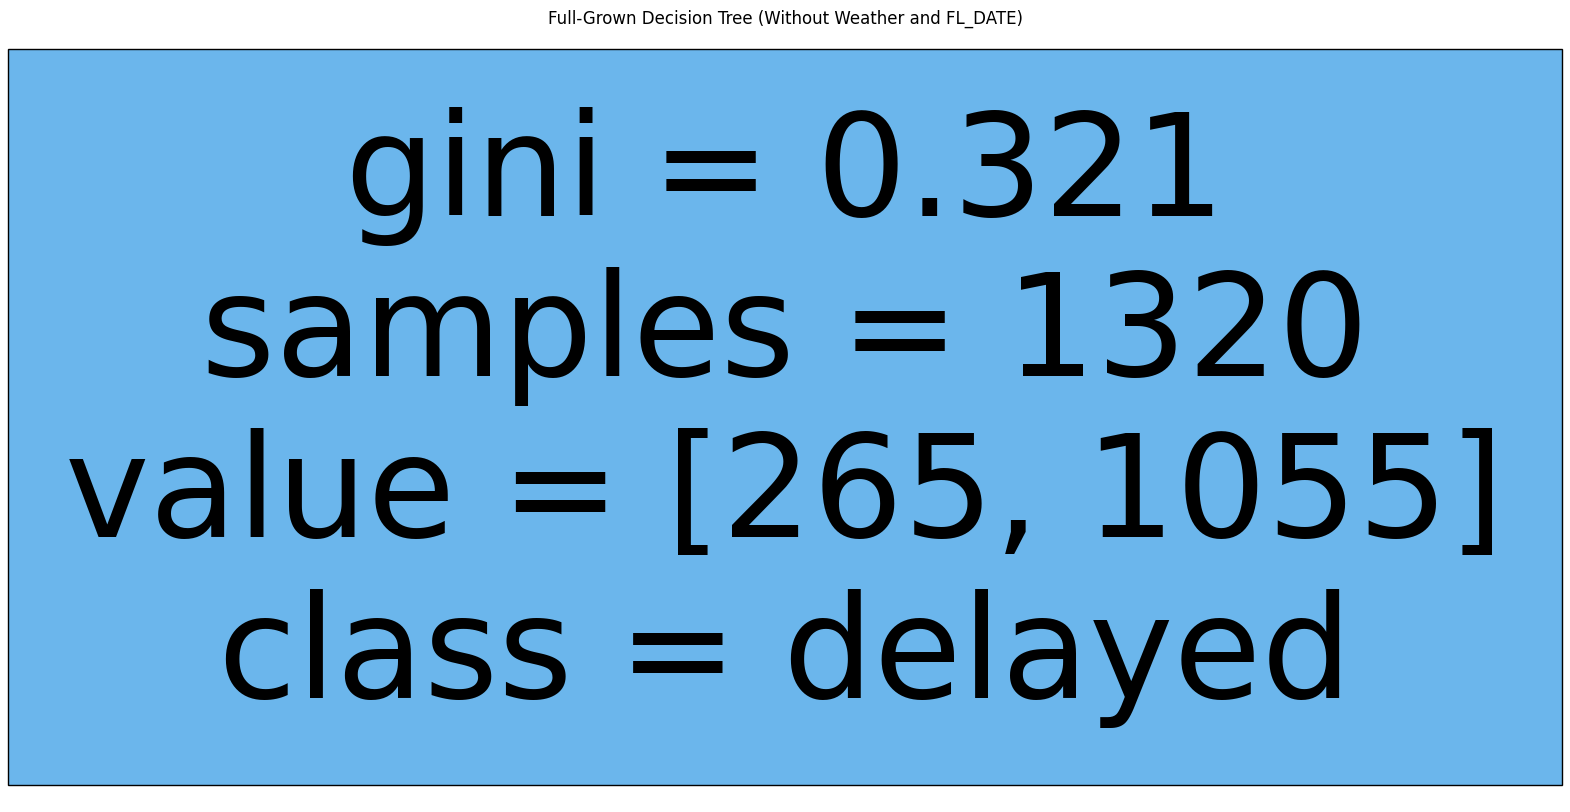

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# Assume delays_df is your DataFrame containing the flight delays data.

# One-hot encode the categorical features (excluding FL_DATE)
delays_df_encoded = pd.get_dummies(delays_df, columns=['CARRIER', 'ORIGIN', 'DAY_WEEK'], drop_first=True)

# Define features without the Weather predictor and FL_DATE
features_without_weather = ['binned_CRS_DEP_TIME', 'DISTANCE'] + \
                            [col for col in delays_df_encoded.columns if 'CARRIER_' in col or 'ORIGIN_' in col]

# Partition the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(delays_df_encoded[features_without_weather],
                                                  delays_df_encoded['Flight Status'],
                                                  test_size=0.4,
                                                  random_state=42)

# Fit the decision tree model (without Weather)
tree_model_no_weather = DecisionTreeClassifier(max_depth=8, min_impurity_decrease=0.01)
tree_model_no_weather.fit(X_train, y_train)

# Plot the full-grown tree
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_model_no_weather, filled=True, feature_names=X_train.columns, class_names=['ontime', 'delayed'])
plt.title("Full-Grown Decision Tree (Without Weather and FL_DATE)")
plt.show()


##Classification Rule for the Small Tree

Since the small tree has a single terminal node, the classification rule can be summarized as follows:

Rule for Classifying: All flights are classified as "ontime" since the node predicts the majority class. There are no conditions leading to splits because the tree reached its maximum depth and ended with this node.

Implications
Overfitting or Underfitting: A tree that results in only one terminal node (especially if it's the majority class) may indicate that the model is not capturing enough variance in the data, potentially leading to underfitting. This can happen if the features are not informative enough or if the tree is too constrained.

Feature Importance: The exclusion of certain predictors (like Weather) seems to lead to a model that is not robust, indicating that these predictors may be important for distinguishing between delayed and on-time flights.

ii

##Rule from the Small Tree

The classification rule derived from the small tree can be summarized as:

If the flight reaches the terminal node (which is all flights in this case),
Then classify the flight as "ontime."

## Equivalent Statements

This rule can be considered equivalent to saying:

Default Classification: Regardless of any other predictors, classify all flights as "ontime."

Majority Class Prediction: Since the majority of the training data in this node is classified as "ontime" (1055 out of 1320 flights), the model defaults to predicting "ontime" for all flights due to the lack of conditions leading to splits in the tree.

iii

In [33]:
from sklearn.tree import DecisionTreeClassifier

# Fit the full-grown decision tree model
full_tree_model = DecisionTreeClassifier(max_depth=None, min_impurity_decrease=0)
full_tree_model.fit(X_train, y_train)


DecisionTreeClassifier(min_impurity_decrease=0)

In [34]:
import pandas as pd

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame(full_tree_model.feature_importances_,
                                    index=X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

# Display the top three predictors
top_three_predictors = feature_importances.head(3)
print(top_three_predictors)


                     importance
binned_CRS_DEP_TIME    0.416076
DISTANCE               0.175560
CARRIER_US             0.174651


The top three predictors according to the full-grown decision tree are as follows:

binned_CRS_DEP_TIME (Importance: 0.4161)

This predictor represents the binned scheduled departure time. It has the highest importance, indicating that the time of day when the flight is scheduled to depart significantly affects whether the flight will be delayed.

DISTANCE (Importance: 0.1756)

This predictor indicates the distance of the flight in miles. Its importance suggests that longer or shorter flights may have different probabilities of delays, possibly due to factors like flight operations, air traffic control, and weather conditions along the route.

CARRIER_US (Importance: 0.1747)

This predictor likely refers to whether the airline is a U.S. carrier. Its importance indicates that the airline itself plays a significant role in predicting flight delays, which could relate to operational efficiency, on-time performance records, and specific policies of different carriers.

iv

The small tree results in a single node because, without the Weather predictor, the remaining predictors do not provide enough information to split the data into distinct classes. Essentially, the remaining predictors do not sufficiently differentiate between delayed and on-time flights, leading the model to classify all instances into a single terminal node, which represents the majority class (in this case, "delayed").

v

The disadvantage of using the top levels of the full-grown tree instead of the small tree is that the full tree may become overly complex, leading to potential overfitting. This complexity can reduce interpretability, making it harder to understand the decision-making process.

Additionally, the full-grown tree may include less relevant predictors that do not significantly improve classification accuracy, while the small tree focuses on the most critical factors, providing clearer insights for decision-making.

vi

When comparing the results from the classification tree to logistic regression, a few possible reasons for the classification tree's failure to find a good predictive model include:

Non-linearity: Classification trees can struggle with linear relationships that logistic regression captures well, especially when the relationship between predictors and the target variable is not hierarchical.

Sensitivity to Noise: Trees are sensitive to noise in the data, which can lead to overfitting, especially if the model complexity isn't controlled.

Feature Interaction: Logistic regression can model interactions among features more effectively through polynomial terms, while trees may not consider interactions unless explicitly modeled.

Small Sample Size: If the dataset is small or lacks diversity, trees may not have enough information to make reliable splits, resulting in poor performance.

Imbalanced Classes: If the target classes are imbalanced, trees may favor the majority class, leading to misleading predictions.

#9.3

# part a (i)

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Load the dataset
data = pd.read_csv('ToyotaCorolla.csv')

# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['fuel_type'], drop_first=True)

# Define the features and target variable
features = [
    'age_08_04', 'km', 'hp', 'automatic', 'doors', 'quarterly_tax',
    'mfr_guarantee', 'guarantee_period', 'airco', 'automatic_airco',
    'cd_player', 'powered_windows', 'sport_model', 'tow_bar'
] + [col for col in data.columns if 'fuel_type_' in col]

X = data[features]
y = data['price']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=1)

# Fit the regression tree model
reg_tree = DecisionTreeRegressor(random_state=1)
reg_tree.fit(X_train, y_train)

# Get feature importance
importance = reg_tree.feature_importances_

# Create a DataFrame to show feature importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
top_features = importance_df.head(4)
print(top_features)


           Feature  Importance
0        age_08_04    0.844867
2               hp    0.053789
1               km    0.049601
9  automatic_airco    0.013358


The three most important car specifications for predicting the price of a used Toyota Corolla are:

Age (age_08_04): 0.845 (dominant factor)

Horsepower (hp): 0.054

Kilometers (km): 0.050

ii

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your data
delays_df = pd.read_csv('ToyotaCorolla.csv')  # Adjust the file name as necessary

# Create your features and target variable
X = delays_df[['age_08_04', 'km', 'fuel_type', 'hp', 'automatic', 'doors',
                'quarterly_tax', 'mfr_guarantee', 'guarantee_period', 'airco',
                'automatic_airco', 'cd_player', 'powered_windows', 'sport_model',
                'tow_bar']]
y = delays_df['price']

# Convert categorical variables to dummies
X = pd.get_dummies(X, columns=['fuel_type'], drop_first=True)

# Split the data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=1, test_size=0.4)


In [41]:
print("X_train columns after dummies:", X_train.columns.tolist())
print("X_valid columns after dummies:", X_valid.columns.tolist())


X_train columns after dummies: ['age_08_04', 'km', 'hp', 'automatic', 'doors', 'quarterly_tax', 'mfr_guarantee', 'guarantee_period', 'airco', 'automatic_airco', 'cd_player', 'powered_windows', 'sport_model', 'tow_bar', 'fuel_type_Diesel', 'fuel_type_Petrol']
X_valid columns after dummies: ['age_08_04', 'km', 'hp', 'automatic', 'doors', 'quarterly_tax', 'mfr_guarantee', 'guarantee_period', 'airco', 'automatic_airco', 'cd_player', 'powered_windows', 'sport_model', 'tow_bar', 'fuel_type_Diesel', 'fuel_type_Petrol']


In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the regression tree model
tree_model = DecisionTreeRegressor(random_state=1)

# Fit the model using training data
tree_model.fit(X_train, y_train)

# Make predictions on the training and validation sets
y_train_pred = tree_model.predict(X_train)
y_valid_pred = tree_model.predict(X_valid)

# Calculate RMS error
rms_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rms_valid = np.sqrt(mean_squared_error(y_valid, y_valid_pred))

print(f'RMS Error (Training): {rms_train}')
print(f'RMS Error (Validation): {rms_valid}')


RMS Error (Training): 0.0
RMS Error (Validation): 1492.3364680637685


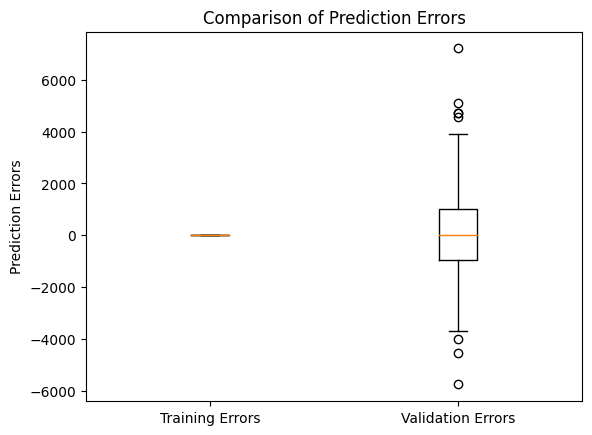

In [43]:
import matplotlib.pyplot as plt

# Calculate the errors
train_errors = y_train - y_train_pred
valid_errors = y_valid - y_valid_pred

# Create boxplots for training and validation errors
plt.boxplot([train_errors, valid_errors], labels=['Training Errors', 'Validation Errors'])
plt.ylabel('Prediction Errors')
plt.title('Comparison of Prediction Errors')
plt.show()


In [44]:
# Example of setting a maximum depth
tree_model_pruned = DecisionTreeRegressor(max_depth=5, random_state=1)
tree_model_pruned.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=1)

In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_model_pruned, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rms_scores = np.sqrt(-scores)
print(f'Cross-Validated RMS Error: {rms_scores.mean()}')


Cross-Validated RMS Error: 1290.3213175619574


Performance Comparison: The training set has an RMS error of 0.0, indicating perfect fit, while the validation set has a higher RMS error of ~1492.34, suggesting overfitting.

Cross-Validation: The cross-validated RMS error is ~1290.32, which is lower than the validation error, indicating better generalization and model reliability.

iii

To improve validation predictive performance at the expense of training performance:

Prune the Tree: Limit depth or minimum samples per split to prevent overfitting.

Use Regularization: Apply Lasso or Ridge to penalize complex models.

Adopt Ensemble Methods: Use Random Forest or Gradient Boosting for better generalization.

Feature Selection: Remove less important features to simplify the model.

Employ Cross-Validation: Use k-fold cross-validation for robust hyperparameter tuning.

Increase Training Data: Gather more data to help the model learn general patterns.

iv

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load your data (replace 'ToyotaCorolla.csv' with your actual dataset)
data = pd.read_csv('ToyotaCorolla.csv')

# Check the first few rows of the DataFrame to find column names
print(data.head())

# Convert 'fuel_type' to dummy variables
data = pd.get_dummies(data, columns=['fuel_type'], drop_first=True)

# Prepare features and target variable
X = data[['age_08_04', 'km', 'hp', 'automatic', 'doors', 'quarterly_tax',
           'mfr_guarantee', 'guarantee_period', 'airco', 'automatic_airco',
           'cd_player', 'powered_windows', 'sport_model', 'tow_bar',
           'fuel_type_Diesel', 'fuel_type_Petrol']]
y = data['price']

# Split the data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=1)

# Define the model and parameter grid
tree_model = DecisionTreeRegressor(random_state=1)
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Perform GridSearchCV
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model
best_tree_model = grid_search.best_estimator_

# Predictions
y_valid_pred = best_tree_model.predict(X_valid)

# Calculate RMS Error for validation set
rms_error_valid = np.sqrt(mean_squared_error(y_valid, y_valid_pred))

# Print results
print("Best Parameters:", grid_search.best_params_)
print("Validation RMS Error (Tuned Tree):", rms_error_valid)


                                           model  price  age_08_04  mfg_month  \
0  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23         10   
1  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23         10   
2  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24          9   
3  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26          7   
4    TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30          3   

   mfg_year     km fuel_type  hp  met_color   color  ...  powered_windows  \
0      2002  46986    Diesel  90          1    Blue  ...                1   
1      2002  72937    Diesel  90          1  Silver  ...                0   
2      2002  41711    Diesel  90          1    Blue  ...                0   
3      2002  48000    Diesel  90          0   Black  ...                0   
4      2002  38500    Diesel  90          0   Black  ...                1   

   power_steering  radio  mistlamps  sport_model  

The tuned decision tree, with the best parameters (max depth of 5, min samples split of 5, and min samples leaf of 1), achieved a validation RMS error of 1176.07. This is lower than the full-grown tree's RMS error, indicating improved predictive performance on the validation set.

The smaller tree reduces overfitting, capturing essential patterns without fitting noise, leading to better generalization to unseen data.








# part b

i

Structure:

Regression Tree (RT): Typically has a continuous output (price) and may result in splits based on specific value ranges.

Classification Tree (CT): Outputs categories (binned prices), likely leading to a different split structure focused on classifying data points into discrete bins.

Top Predictors:

RT Top Predictors: Likely dominated by variables that have a direct correlation with price (e.g., age, km, hp).

CT Top Predictors: May include predictors that help distinguish between the categorical bins, which might not always correlate directly with continuous price values.

Size of Tree:

RT: Might be larger due to continuous output accommodating a wider range of values.

CT: Could be smaller since it simplifies the output to a finite number of bins, potentially requiring fewer splits.

Why the Differences?:

The regression tree focuses on minimizing squared errors for continuous outcomes, while the classification tree aims to maximize the classification accuracy for categorical outcomes. This fundamental difference in objectives leads to variations in splits, tree structure, and predictor importance. The categorization of the price variable into bins also influences which features become more relevant in the classification context.

ii

In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer

# Sample data
data = {
    'age_08_04': [23, 23, 24, 26, 30, 77],
    'km': [46986, 72937, 41711, 48000, 38500, 117000],
    'fuel_type': ['Diesel', 'Diesel', 'Diesel', 'Diesel', 'Diesel', 'Petrol'],
    'hp': [90, 90, 90, 90, 90, 110],
    'automatic': [1, 1, 1, 1, 0, 0],
    'doors': [3, 3, 3, 3, 3, 5],
    'quarterly_tax': [100, 100, 100, 0, 0, 100],
    'mfr_guarantee': [0, 0, 0, 0, 0, 0],
    'guarantee_period': [3, 3, 3, 0, 0, 3],
    'airco': [1, 1, 1, 0, 0, 1],
    'automatic_airco': [0, 0, 0, 0, 0, 0],
    'cd_player': [0, 0, 0, 0, 0, 0],
    'powered_windows': [1, 0, 0, 0, 0, 0],
    'sport_model': [0, 0, 0, 0, 0, 0],
    'tow_bar': [0, 0, 0, 0, 0, 1],
    'price': [13500, 13750, 13950, 14950, 13750, 10000]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Create dummy variables for 'fuel_type'
df = pd.get_dummies(df, columns=['fuel_type'], drop_first=True)

# Prepare features and target variable for Regression Tree
X = df.drop(['price'], axis=1)
y = df['price']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a smaller regression tree model
rt_model = DecisionTreeRegressor(random_state=42)
rt_model.fit(X_train, y_train)

# Now create binned price variable for classification tree
kbin = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='uniform')
df['Binned_Price'] = kbin.fit_transform(df[['price']]).astype(int)

# Prepare features and target variable for Classification Tree
y_binned = df['Binned_Price']
X_train_bin, X_valid_bin, y_train_bin, y_valid_bin = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Create and train a smaller classification tree model
ct_model = DecisionTreeClassifier(random_state=42)
ct_model.fit(X_train_bin, y_train_bin)

# Define the specifications for the Toyota Corolla
input_data = {
    'age_08_04': [77],
    'km': [117000],
    'hp': [110],
    'automatic': [0],
    'doors': [5],
    'quarterly_tax': [100],
    'mfr_guarantee': [0],
    'guarantee_period': [3],
    'airco': [1],
    'automatic_airco': [0],
    'cd_player': [0],
    'powered_windows': [0],
    'sport_model': [0],
    'tow_bar': [1],
    'fuel_type_Diesel': [0],  # Adjusted for dummy variable
    'fuel_type_Petrol': [1]    # Adjusted for dummy variable
}

# Convert to DataFrame to match expected input
input_df = pd.DataFrame(input_data)

# Ensure input_df has the same columns as X
input_df = input_df.reindex(columns=X.columns, fill_value=0)

# Predict price using the smaller regression tree (RT)
predicted_price_rt = rt_model.predict(input_df)

# Predict binned price using the smaller classification tree (CT)
predicted_binned_price_ct = ct_model.predict(input_df)

# Translate the predicted binned price to an estimated price
price_bins = kbin.bin_edges_[0]  # Get the edges of the bins
average_prices = [(price_bins[i] + price_bins[i+1]) / 2 for i in range(len(price_bins)-1)]

# Get the estimated price from the classification model
estimated_price_ct = average_prices[predicted_binned_price_ct[0]]

# Output results
print(f"Predicted Price (RT): {predicted_price_rt[0]}")
print(f"Predicted Binned Price (CT): {predicted_binned_price_ct[0]}")
print(f"Estimated Price from CT: {estimated_price_ct:.2f}")


Predicted Price (RT): 10000.0
Predicted Binned Price (CT): 0
Estimated Price from CT: 10123.75


iii

##Comparison of Predictions from RT and CT

Predictors Used: Both models used the same input features, including age, kilometers, fuel type, horsepower, and various vehicle attributes.

Magnitude of Difference:

Predicted Price (RT): 10,000.0

Estimated Price from CT: 10,123.75

Predicted Binned Price (CT): 0

The small difference of 123.75 highlights the RT's
precision, while the CT's binned prediction suggests a
significantly lower perceived value.

##Advantages and Disadvantages:

##Regression Tree (RT):

Advantages: Directly predicts continuous values; captures nonlinear relationships; easy to interpret.

Disadvantages: Prone to overfitting; sensitive to outliers.

##Classification Tree (CT):

Advantages: Effective for categorical outcomes; less sensitive to outliers.

Disadvantages: Provides less precise predictions; binning can lead to loss of information.